In [1]:
import pandas as pd
import graphviz
import json
from surrogate.rules import print_decisions

In [2]:
df = pd.read_csv('surrogate_proto.csv')

In [3]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,input_query,cf,input_query_nn_pred,cf_nn_pred,permutation_nn_pred_portion,input_query_tree_pred,cf_tree_pred,input_query_decisions,cf_decisions,dot_data,sparsity,distance,depth_diff,has_same_input_pred,has_same_cf_pred
0,0,0,"[1.0, 189.0, 56.065574, 23.0, 846.0, 30.1, 0.3...","[4.864439487457275, 77.6102294921875, 56.06557...",0.953594,0.473794,"[541, 556]",[1.],[1.],"[{""node_id"": 0, ""feature_idx"": 1, ""feature_nam...","[{""node_id"": 0, ""feature_idx"": 1, ""feature_nam...","digraph Tree {\nnode [shape=box] ;\n0 [label=""...",6,173.446437,1,True,False
1,1,1,"[1.0, 180.0, 0.0, 0.0, 0.0, 43.3, 0.275591, 41.0]","[1.0, 162.397216796875, 0.0, 0.0, 0.0, 22.1855...",0.864986,0.491717,"[524, 572]",[1.],[0.],"[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","digraph Tree {\nnode [shape=box] ;\n0 [label=""...",3,27.489613,1,True,True
2,2,2,"[8.0, 179.0, 67.278689, 42.0, 130.0, 32.7, 0.7...","[8.0, 89.77251434326172, 67.2786865234375, 45....",0.866738,0.498792,"[537, 558]",[1.],[0.],"[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","digraph Tree {\nnode [shape=box] ;\n0 [label=""...",5,89.292647,0,True,True
3,3,3,"[8.0, 151.0, 72.885246, 32.0, 210.0, 42.9, 0.5...","[8.0, 98.7505874633789, 72.88524627685547, 32....",0.844363,0.499490,"[541, 555]",[1.],[1.],"[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","digraph Tree {\nnode [shape=box] ;\n0 [label=""...",5,52.251378,0,True,False
4,4,4,"[11.0, 138.0, 69.147541, 26.0, 144.0, 36.1, 0....","[10.591582298278809, 67.5608139038086, 72.2386...",0.780766,0.495823,"[539, 559]",[1.],[0.],"[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","digraph Tree {\nnode [shape=box] ;\n0 [label=""...",6,105.189192,1,True,True


[`input_query`] -> Input query for generating counterfactual.

[`cf`] -> Counterfactual found through CounterfactaulProto.

[`input_query_nn_pred`] -> Prediction value for input_query using our model.

[`cf_nn_pred`] -> Predictino value for cf using our model.

[`permutation_nn_pred_portion`] -> The permutation dataset label size for `[0, 1]` # Checking balance.

[`input_query_tree_pred`] -> Prediction value for input_query using surrogate decision tree.

[`cf_tree_pred`] -> Prediction value for cf using surrogate decision tree.

[`input_query_decisions`] -> Rules extracted when predicting input query using surrogate decision tree.

[`cf_decisions`] -> Rules extracted when predicting cf using surrogate decision tree.

[`dot_data`] -> Dot data to plot the surrogate decision tree. # Example below

[`sparsity`] -> How many features changed.

[`distance`] -> L2 distance btw input_query and counterfactual.

[`depth_diff`] -> Depth difference btw input_query and cf.

[`has_same_input_pred`] -> Our model and surrogate decision tree has same prediction on input_query.

[`has_same_cf_pred`] -> Our model and surrogate decision tree has same prediction on cf.


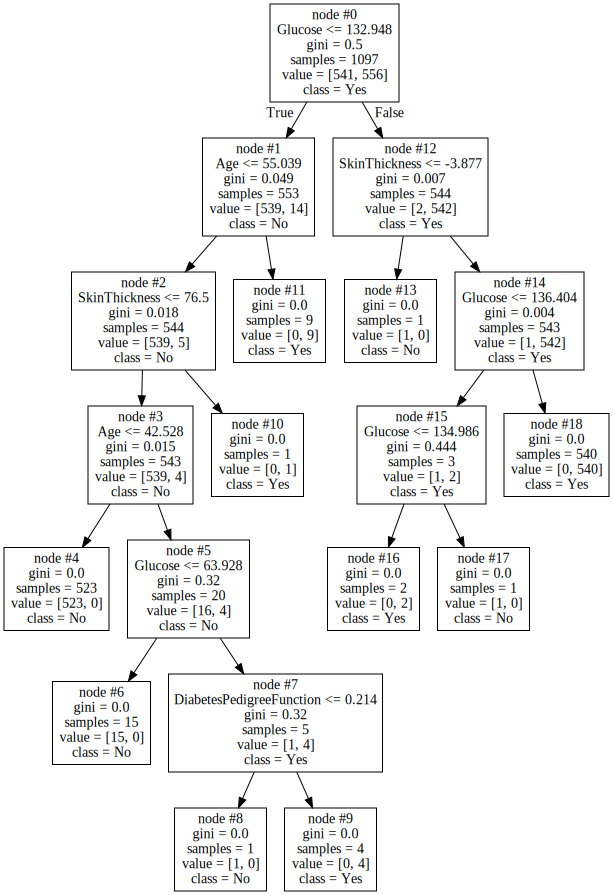

In [4]:
example = df.iloc[0]
graphviz.Source(example['dot_data'], format="png") 

In [11]:
input_query_true = df[df['has_same_input_pred']==True]
input_query_cf_true = input_query_true[input_query_true['has_same_cf_pred']==True]
print(f"In {len(input_query_cf_true) / len(df)} % of the case, the surrogate decision have the same prediction result as our model in input query and its counterfactual.")

In 0.3375 % of the case, the surrogate decision have the same prediction result as our model in input query and its counterfactual.


In [6]:
example['cf_decisions']

'[{"node_id": 0, "feature_idx": 1, "feature_name": "Glucose", "value": 77.6102294921875, "threshold_sign": "<=", "threshold": 132.9477310180664}, {"node_id": 1, "feature_idx": 7, "feature_name": "Age", "value": 59.0, "threshold_sign": ">", "threshold": 55.03864288330078}]'

In [9]:
## Print the decision rules for input_query.
print_decisions(json.loads(example['input_query_decisions']))

decision node 0 : (x [Glucose] = 189.0) > 132.9477310180664)
decision node 12 : (x [SkinThickness] = 23.0) > -3.8774678111076355)
decision node 14 : (x [Glucose] = 189.0) > 136.4044647216797)


In [10]:
## Print the decision rules for cf.
print_decisions(json.loads(example['cf_decisions'].replace('\'','\"')))

decision node 0 : (x [Glucose] = 77.6102294921875) <= 132.9477310180664)
decision node 1 : (x [Age] = 59.0) > 55.03864288330078)
